# Tagging automático

* *30 min* | Última modificación: Diciembre 4, 2020

http://www.nltk.org/book/

Text Analytics with Python

In [1]:
##
## Preparación
##
import nltk
from nltk.corpus import brown

##
## Tags por frase
##
brown_tagged_sents = brown.tagged_sents(categories="news")
brown_tagged_sents

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [2]:
##
## Sentencias tokenizadas
##
brown_sents = brown.sents(categories="news")
brown_sents

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [3]:
##
## Default tagger
##   Se asigna el tag mas común.
##   Cómputo del tag más común
##
tags = [tag for (word, tag) in brown.tagged_words(categories="news")]
nltk.FreqDist(tags).max()

'NN'

In [4]:
##
## Tagging
##
raw = "I do not like green eggs and ham, I do not like them Sam I am!"
tokens = nltk.word_tokenize(raw)

## Crea el tagger
default_tagger = nltk.DefaultTagger("NN")

## Aplica el tagger
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [5]:
##
## Evaluación del DefaultTagger('NN') vs las
## palabras ya clasificadas. El valor indica
## el porcentaje de tags correctamente asignados
##
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

In [6]:
##
## Regular expression tagger
##   Asigna los tokens de acuerdo a los patrones
##   dados como expresiones regulares
##
patterns = [
    (r".*ing$", "VBG"),  # gerunds
    (r".*ed$", "VBD"),  # simple past
    (r".*es$", "VBZ"),  # 3rd singular present
    (r".*ould$", "MD"),  # modals
    (r".*\'s$", "NN$"),  # possessive nouns
    (r".*s$", "NNS"),  # plural nouns
    (r"^-?[0-9]+(\.[0-9]+)?$", "CD"),  # cardinal numbers
    (r".*", "NN"),  # nouns (default)
]

## crea el tagger
regexp_tagger = nltk.RegexpTagger(patterns)

## aplica el tagger a una sentencia
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [7]:
##
## Evaluación de la precisión del tagger
##
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

In [8]:
##
## Lookup tagger
##   Busca las N palabras más frecuentes y almacena
##   su tag más probable
##

## Computa las palabras más frecuentes
fd = nltk.FreqDist(brown.words(categories="news"))
most_freq_words = fd.most_common(100)

## computa el tag más frecuente para cada palabra
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories="news"))
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

## construye el tagger
baseline_tagger = nltk.UnigramTagger(model=likely_tags)

## Evaluación
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [9]:
##
## Aplica el tagger
##
baseline_tagger.tag(brown.sents(categories="news")[3])

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [10]:
##
## Note que muchos de los tags anteriores son None.
## En este caso se puede utilizar otro tagger para que
## clasifique estos tokens
##
baseline_tagger = nltk.UnigramTagger(
    model=likely_tags, backoff=nltk.DefaultTagger("NN")
)

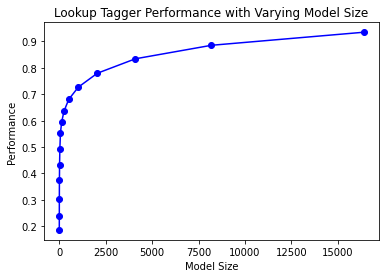

In [11]:
##
## El siguiente fragmento de código permite evaluar
## el tagger para diferentes cantidades de palabras
##
def display():
    def performance(cfd, wordlist):
        lt = dict((word, cfd[word].max()) for word in wordlist)
        baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger("NN"))
        return baseline_tagger.evaluate(brown.tagged_sents(categories="news"))

    import pylab

    word_freqs = nltk.FreqDist(brown.words(categories="news")).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories="news"))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, "-bo")
    pylab.title("Lookup Tagger Performance with Varying Model Size")
    pylab.xlabel("Model Size")
    pylab.ylabel("Performance")
    pylab.show()


display()

In [12]:
##
## Unigram tagging
##   Se basa en asignar el tag que es más frecuente para
##   la palabra analizada. Este tagger puede ser
##   *entrenado*
##
from nltk.corpus import brown

## Obtiene las palabras y sus tags
brown_tagged_sents = brown.tagged_sents(categories="news")

## obtiene las sentencias
brown_sents = brown.sents(categories="news")

## El constructor recibe las sentencias taggeadas
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

##
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [13]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

In [14]:
##
## Creación de conjuntos de entrenamiento y
## validación
##
size = int(len(brown_tagged_sents) * 0.9)
size

4160

In [15]:
##
## Entrenamiento y validación
##
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8121200039868434

In [16]:
##
## General N-gram tagging
##  Asigna el tag com base en los n-1 tags previos
##  teniendo en cuenta el contexto
##
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [17]:
##
## uso del tagger entrenado
##
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [18]:
##
## Evaluación del tagger
##
bigram_tagger.evaluate(test_sents)

0.10206319146815508

In [19]:
##
## Combinación de taggers
##   backoff indica el tagger que se usa si el
##   tagger actual no encuentra un token adecuado
##
t0 = nltk.DefaultTagger("NN")
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

In [20]:
##
## Almacenamiento de taggers usando pickle
##
from pickle import dump

output = open("t2.pkl", "wb")
dump(t2, output, -1)
output.close()

In [21]:
##
## Recuperación del tagger almacenado en disco
##
from pickle import load

input = open("t2.pkl", "rb")
tagger = load(input)
input.close()

In [22]:
##
## Uso del tagger recuperado
##
text = """The board's action shows what free enterprise
    is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]